In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
error = pd.read_csv('errors.csv')

In [3]:
error.head(5)

,SNo,Options,Error
0,1,['Rachel and I works at a school.'],Incorrect verb form with compound subject
1,2,"[""8764031748 aren't my number.""]",No error found
2,3,"[""8764031748 doesn't my number.""]",No error found
3,4,"[""8764031748 is don't my number.""]",No error found
4,5,"[""8764031748 isn't my number.""]",No error found


In [4]:
error.fillna(' ', inplace = True)

In [5]:
error_1 = error[error['Error'] != 'No error found']

In [6]:
error_1.head()

,SNo,Options,Error
0,1,['Rachel and I works at a school.'],Incorrect verb form with compound subject
5,6,['A blizzard could be break all the trees of t...,Incorrect verb form
7,8,['A blizzard has break all the trees of the fo...,Incorrect verb form in perfect tense
8,9,['A blizzard have to break all the trees of th...,Incorrect verb form with singular subject
12,13,"['A movie named ""Main madhuri dixit banna chah...",Unknown word


In [29]:
p = error[error['Error'] != 'No error found']

TypeError: string indices must be integers

In [8]:
errors = error['Error']

In [41]:
for error in errors:
    if type(error) != type('Ashu'):
        print(error)

nan
nan
nan
nan
nan


In [42]:
errors = np.array(errors)

In [12]:
errors = str(errors)

In [9]:
unique_errors, unique_error_counts = np.unique(errors, return_counts=True)

In [10]:
unique_error_counts

array([ 11,   1,   1,  16,   1,   1,   5,   7,   6,  15,   5,   2,   5,
         1,   2,   2,   2,   3,   1,   2,   1,   5,   1,  41,  10,   2,
        21,  13,   1,   1,   2,  36,   4,   9,   2,   2,   1,  10,   1,
       134,  38,   8,  28,  40,   2,   1,   1,  13,  12,   3,  33,   3,
       986,   2,   5,   2,   1,   7,   4,   6,   1,   2,   1,   1,  13,
         3,   2,   1,  16,   2,   1,   2,   1,   1,   6,   5,   1,   2,
         3,   4,   2,   5,   1,   9,   7,   4,   1,   2,   1,   1,   1,
         5,   1,   1,   3,   3,   1,   4,   2,   1,   1,   3,   1,   1,
         5,   1])

In [13]:
unique_error_counts

array([ 11,   1,   1,  16,   1,   1,   5,   7,   6,  15,   5,   2,   5,
         1,   2,   2,   2,   3,   1,   2,   1,   5,   1,  41,  10,   2,
        21,  13,   1,   1,   2,  36,   4,   9,   2,   2,   1,  10,   1,
       134,  38,   8,  28,  40,   2,   1,   1,  13,  12,   3,  33,   3,
       986,   2,   5,   2,   1,   7,   4,   6,   1,   2,   1,   1,  13,
         3,   2,   1,  16,   2,   1,   2,   1,   1,   6,   5,   1,   2,
         3,   4,   2,   5,   1,   9,   7,   4,   1,   2,   1,   1,   1,
         5,   1,   1,   3,   3,   1,   4,   2,   1,   1,   3,   1,   1,
         5,   1])

In [14]:
index = np.where(unique_errors == 'No error found')
unique_errors = np.delete(unique_errors, index)
unique_error_counts = np.delete(unique_error_counts, index)

In [15]:
import matplotlib.pyplot as plt

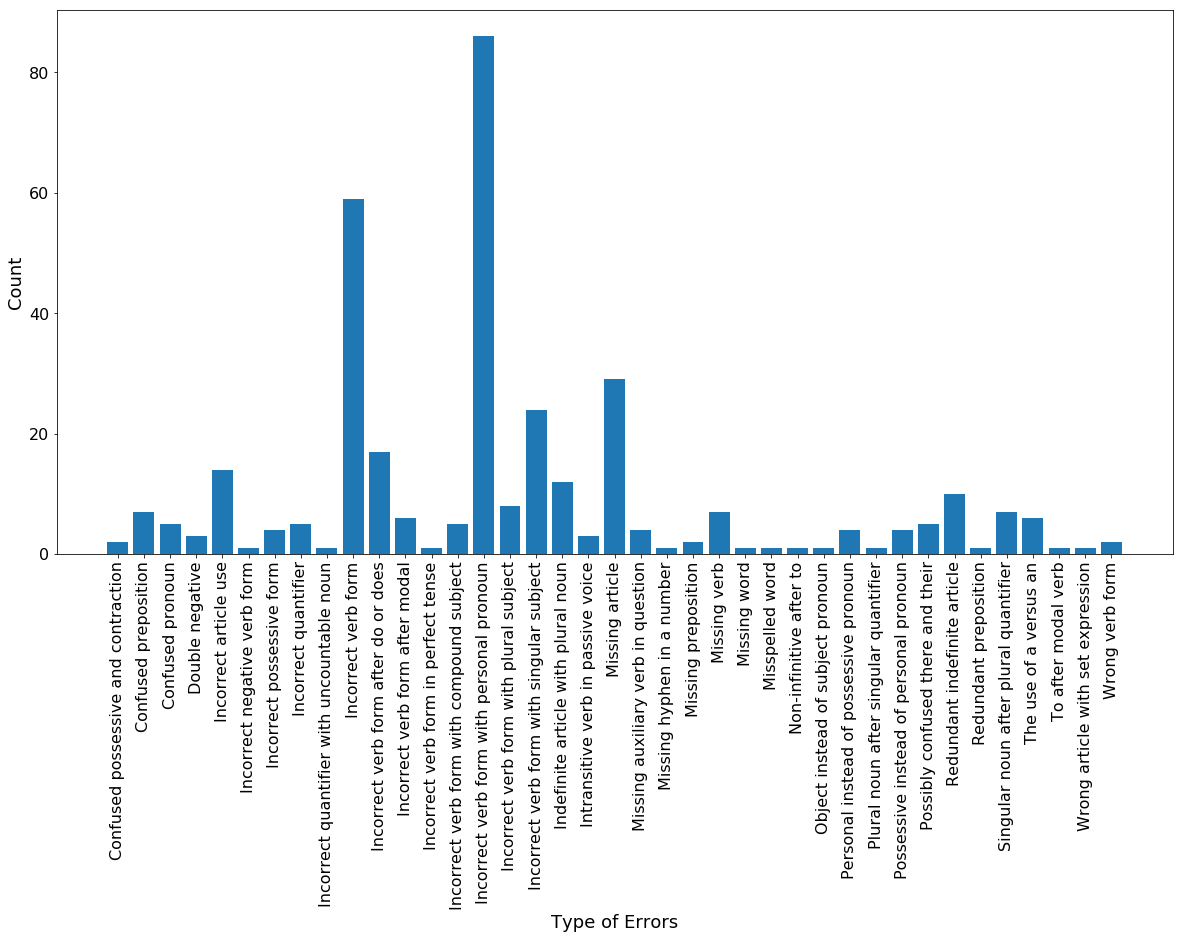

In [52]:
fig = plt.figure(figsize=(20,10))
plt.bar(unique_errors, unique_error_counts)
plt.xlabel('Type of Errors', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.tick_params(labelsize=16)
plt.xticks(rotation=90)
plt.show()
fig.savefig('errors_plot.png')

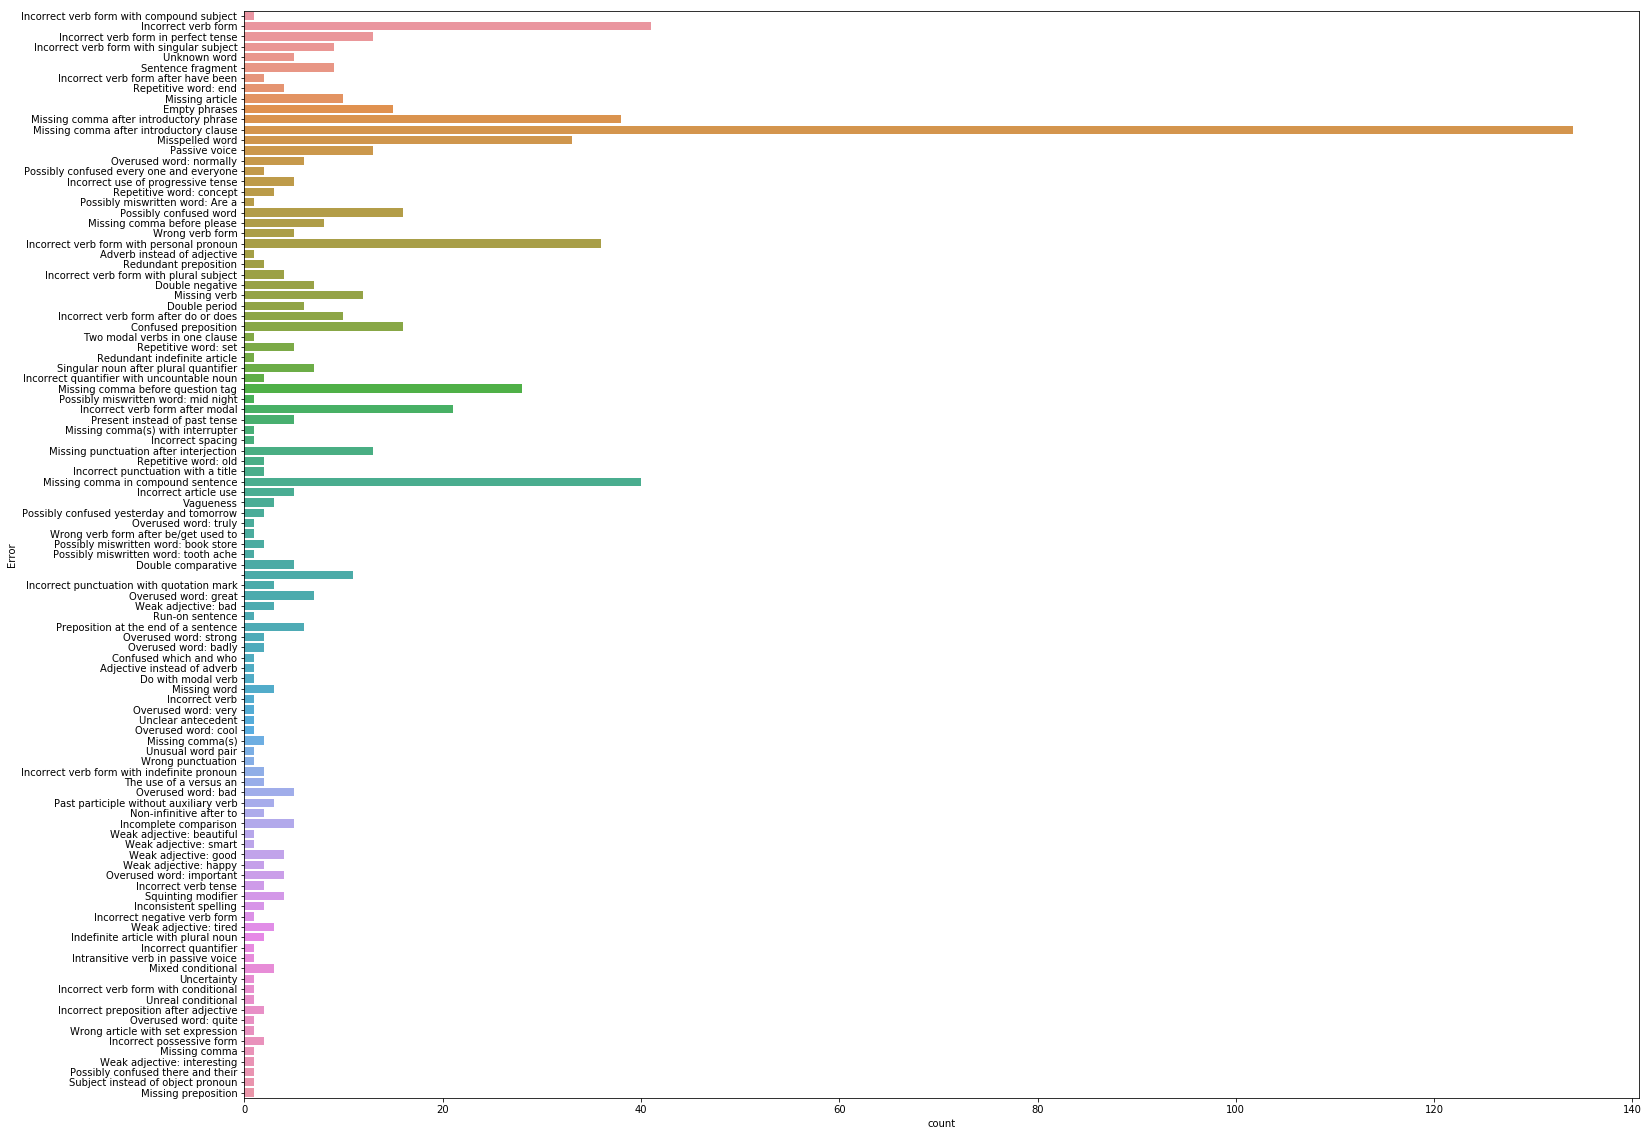

In [16]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(25,20))
sns.set(style="darkgrid")
sns_plot = sns.countplot(ax=ax, y="Error", data=error_1)
fig = sns_plot.get_figure()
fig.savefig('output.png') 

In [17]:
error.head()

,SNo,Options,Error
0,1,['Rachel and I works at a school.'],Incorrect verb form with compound subject
1,2,"[""8764031748 aren't my number.""]",No error found
2,3,"[""8764031748 doesn't my number.""]",No error found
3,4,"[""8764031748 is don't my number.""]",No error found
4,5,"[""8764031748 isn't my number.""]",No error found


In [18]:
error.drop(['SNo'], axis = 1, inplace= True)

In [19]:
error.tail()

,Options,Error
1711,"['Yes', ' I like a salad and a mushroom pasta.']",Incorrect article use
1712,"['Yes', ' I would like a salad and a mushroom ...",Missing punctuation after interjection
1713,"['Yes', ' I would like a salad or a mushroom p...",No error found
1714,"['Yes', ' I would like a salads and a mushroom...",Indefinite article with plural noun
1715,"['Yesterday', ' he was very happy.']",Weak adjective: happy


In [20]:
def exp(text):
    return text[text.find("\[\"|\'")+1:text.find("'|\"]")][1:]

In [21]:
exp(error['Options'][956])

"'These tastes really good! Here', ' have a bite from my plate.'"

In [22]:
error['Options'] = error['Options'].apply(exp)

In [23]:
error.to_excel('error_misc.xlsx')